<a href="https://colab.research.google.com/github/stacykeago/Independent-project-week-7.Machine-learning/blob/main/Independent_Project_week_2_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

Within your deliverable you are expected to:

Define the question, the metric for success, the context, experimental design taken.
Read and explore the given dataset.
Define the appropriateness of the available data to answer the given question.
Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.
Performing regression analysis.
Incorporate categorical independent variables into your models.
Check for multicollinearity
Provide a recommendation based on your analysis. 
Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
Challenge your solution by providing insights on how you can make improvements in model improvement.
While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

Multiple Linear Regression
Quantile Regression
Ridge Regression
Lasso Regression
Elastic Net Regression
Remember to go through the rubric so that you can see how you will be assessed on the above regression techniques. 

Dataset

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset (Links to an external site.)]. 

Below is the dataset glossary:

Id 
price  - Price of the house
bedrooms - Number of Bedrooms
bathrooms - Number of Bathrooms
sqft_living - Square feet area of living area
sqft_lot  - Square feet area of parking Layout
floors - Number of Floors
waterfront - Whether waterfront is there or not
view - Number of Views
grade - Grades
sqft_above
sqft_basement - Square feet area off basement
yr_built - Year the house is built
yr_renovated - Year the house is renovated
zipcode - zipcode os the house
lat : Latitude of the house
lon : Longitude of the house
sqft_living15
sqft_lot15

# Specifying the question

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# Define the metrics for success

The model will be found successful if it is able to predict the prices for houses based on the predictor variables.

# Data Cleaning

### Import Libraries

In [63]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


### Load and preview dataset

In [ ]:
# Load Data
# Dataset link  http://bit.ly/IndependentProjectWeek7Dataset
houses =pd.read_csv('/content/Independent Project Week 7 - house_data.csv')


In [ ]:
# Preview dataset
houses.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [ ]:
houses.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

### Check for the shape

In [ ]:
# Check for the shape
houses.shape

(21613, 20)

### Check for statistical information

In [ ]:
houses.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

Data has 21613 Rows and 20 columns

### Check the data types

In [ ]:
# Check the data types
houses.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Check whether each column has appropirate datatype

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

#### Convert to appropirate data types

In [ ]:
# converting variables from float to int 
houses['bathrooms'] = houses['bathrooms'].astype(int)
houses['floors'] = houses['floors'].astype(int)
houses['price'] = houses['price'].astype(int)
houses.dtypes

id                 int64
price              int64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
print('THE COLUMN NAMES FOR THIS DATASET ARE:')
houses.columns

THE COLUMN NAMES FOR THIS DATASET ARE:


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Check for Null values

In [ ]:
# Check for Null/ missing numbers
houses.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Data has no Null values

### Check for and drop duplicates

In [ ]:
# Check for duplicates
houses.duplicated().sum()

3

In [ ]:
# Drop duplicates
houses.drop_duplicates(inplace=True)
houses.duplicated().sum()

0

### Check for and deal with outliers

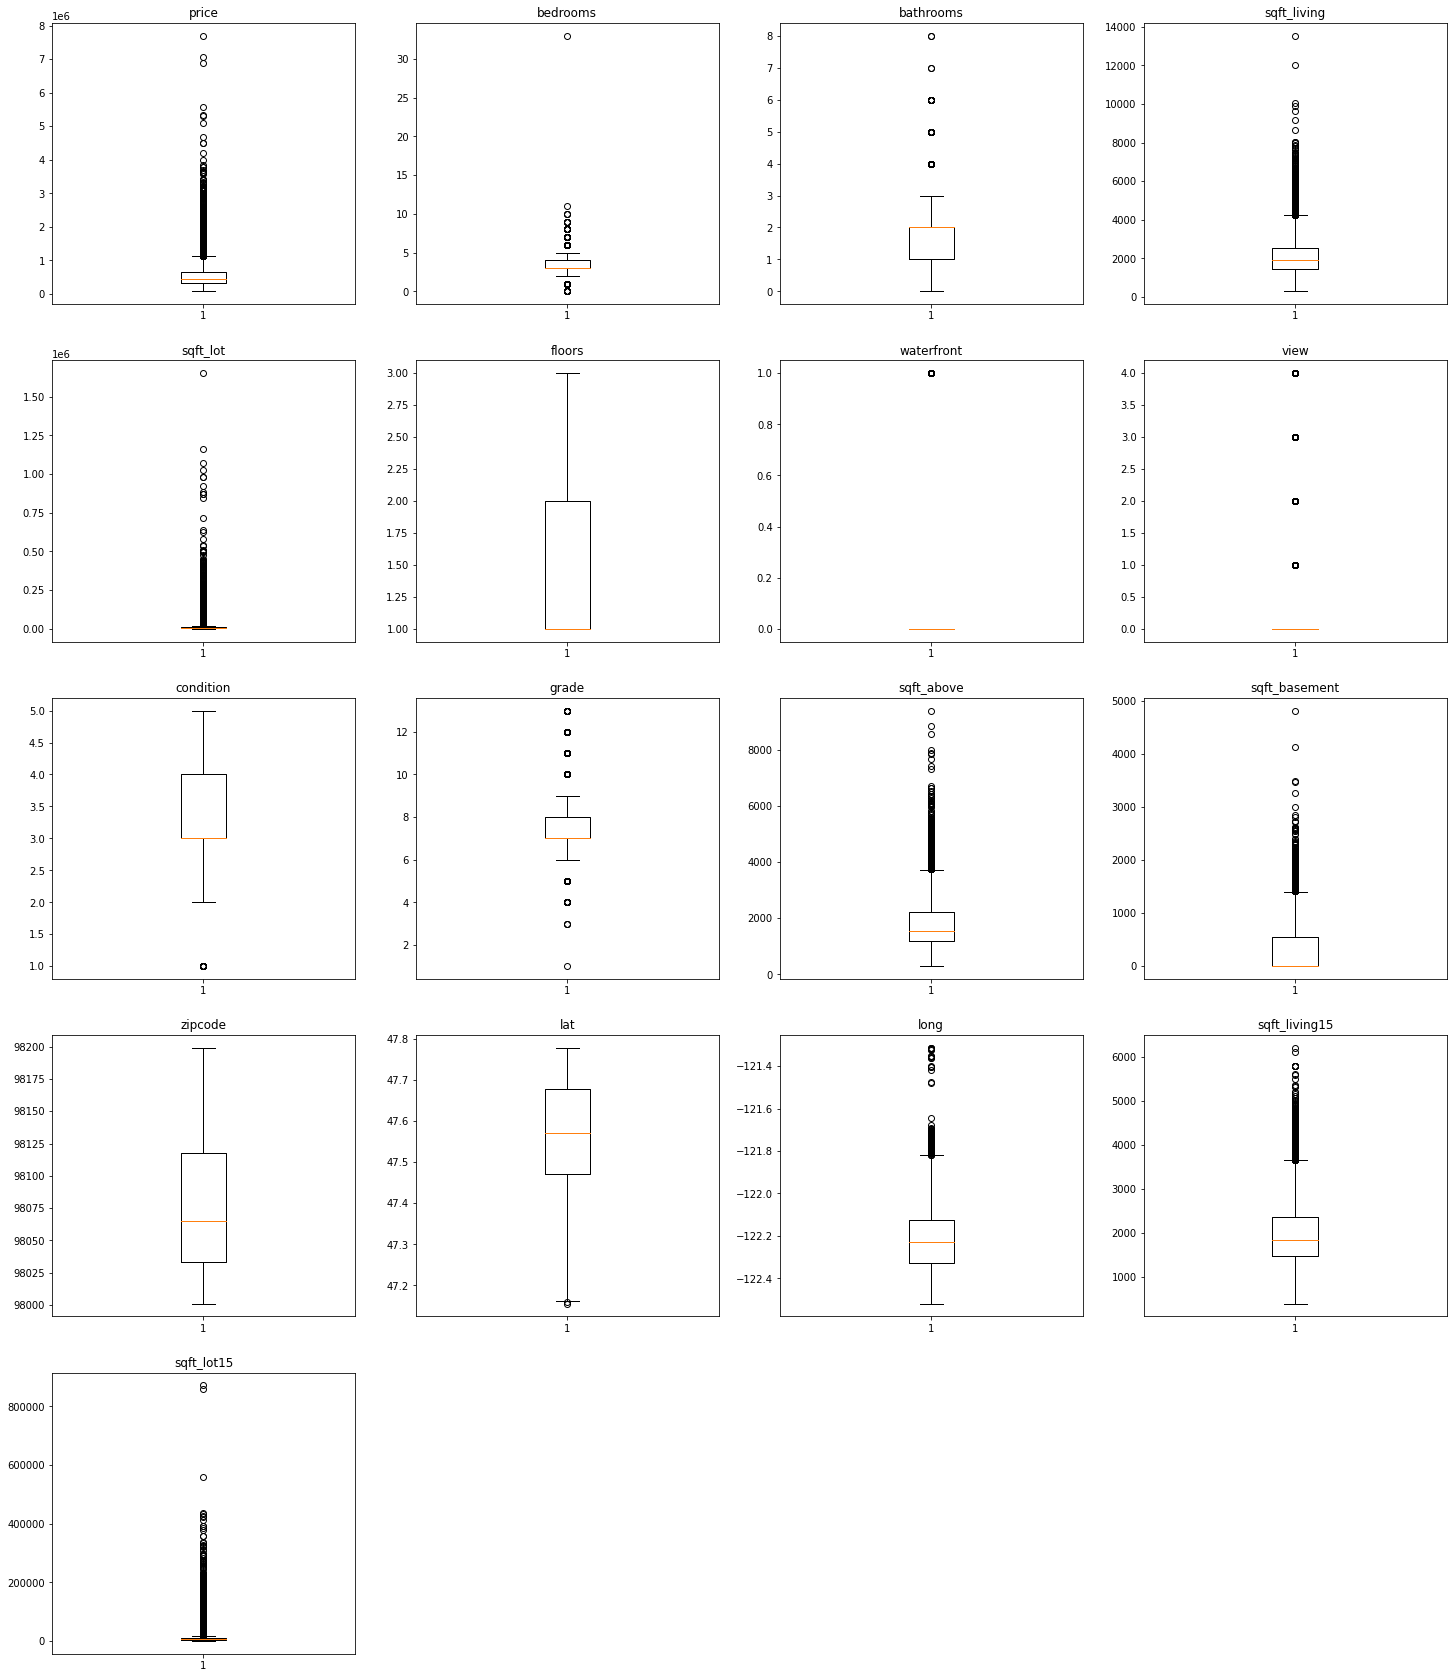

In [ ]:
#Check for outliers

columns_dict ={'price':1,'bedrooms':2,'bathrooms':3,'sqft_living':4,'sqft_lot':5,
          'floors':6,'waterfront':7,'view':8,'condition':9,'grade':10,
          'sqft_above':11,'sqft_basement':12,'zipcode':13,'lat':14,
          'long':15,'sqft_living15':16,'sqft_lot15':17}

plt.figure(figsize=(25,30))
for variable, i in columns_dict.items(): 
  plt.subplot(5,4,i)
  plt.boxplot(houses[variable])
  plt.title(variable)

plt.show() 

### Univariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

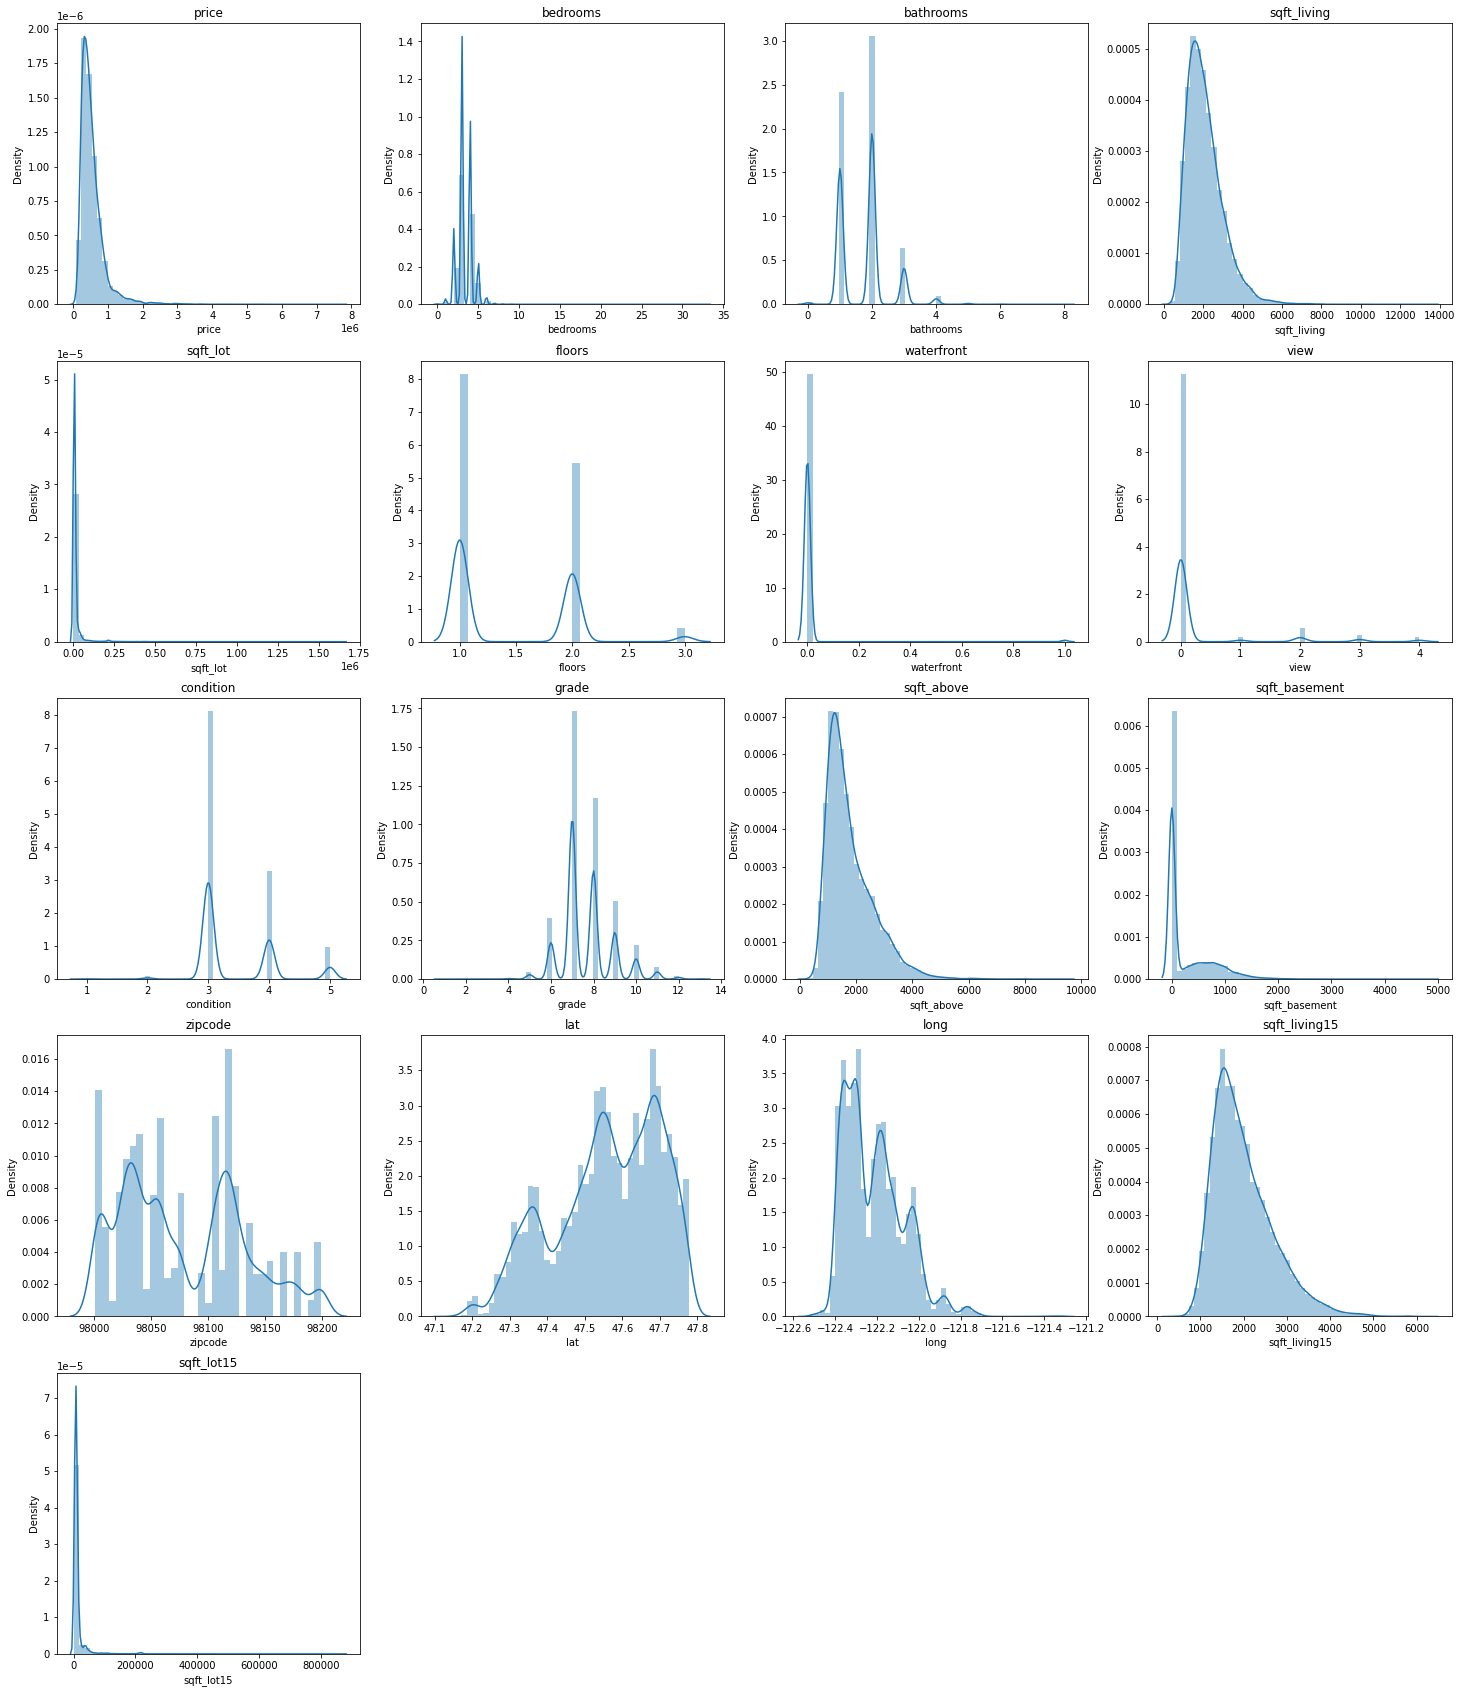

In [ ]:
# Plot the univariate summaries.
columns_dict ={'price':1,'bedrooms':2,'bathrooms':3,'sqft_living':4,'sqft_lot':5,
          'floors':6,'waterfront':7,'view':8,'condition':9,'grade':10,
          'sqft_above':11,'sqft_basement':12,'zipcode':13,'lat':14,
          'long':15,'sqft_living15':16,'sqft_lot15':17}

plt.figure(figsize=(25,30))
for variable, i in columns_dict.items(): 
  plt.subplot(5,4,i)
  sns.distplot(houses[variable])
  plt.title(variable)

plt.show()

### Bivariate analysis

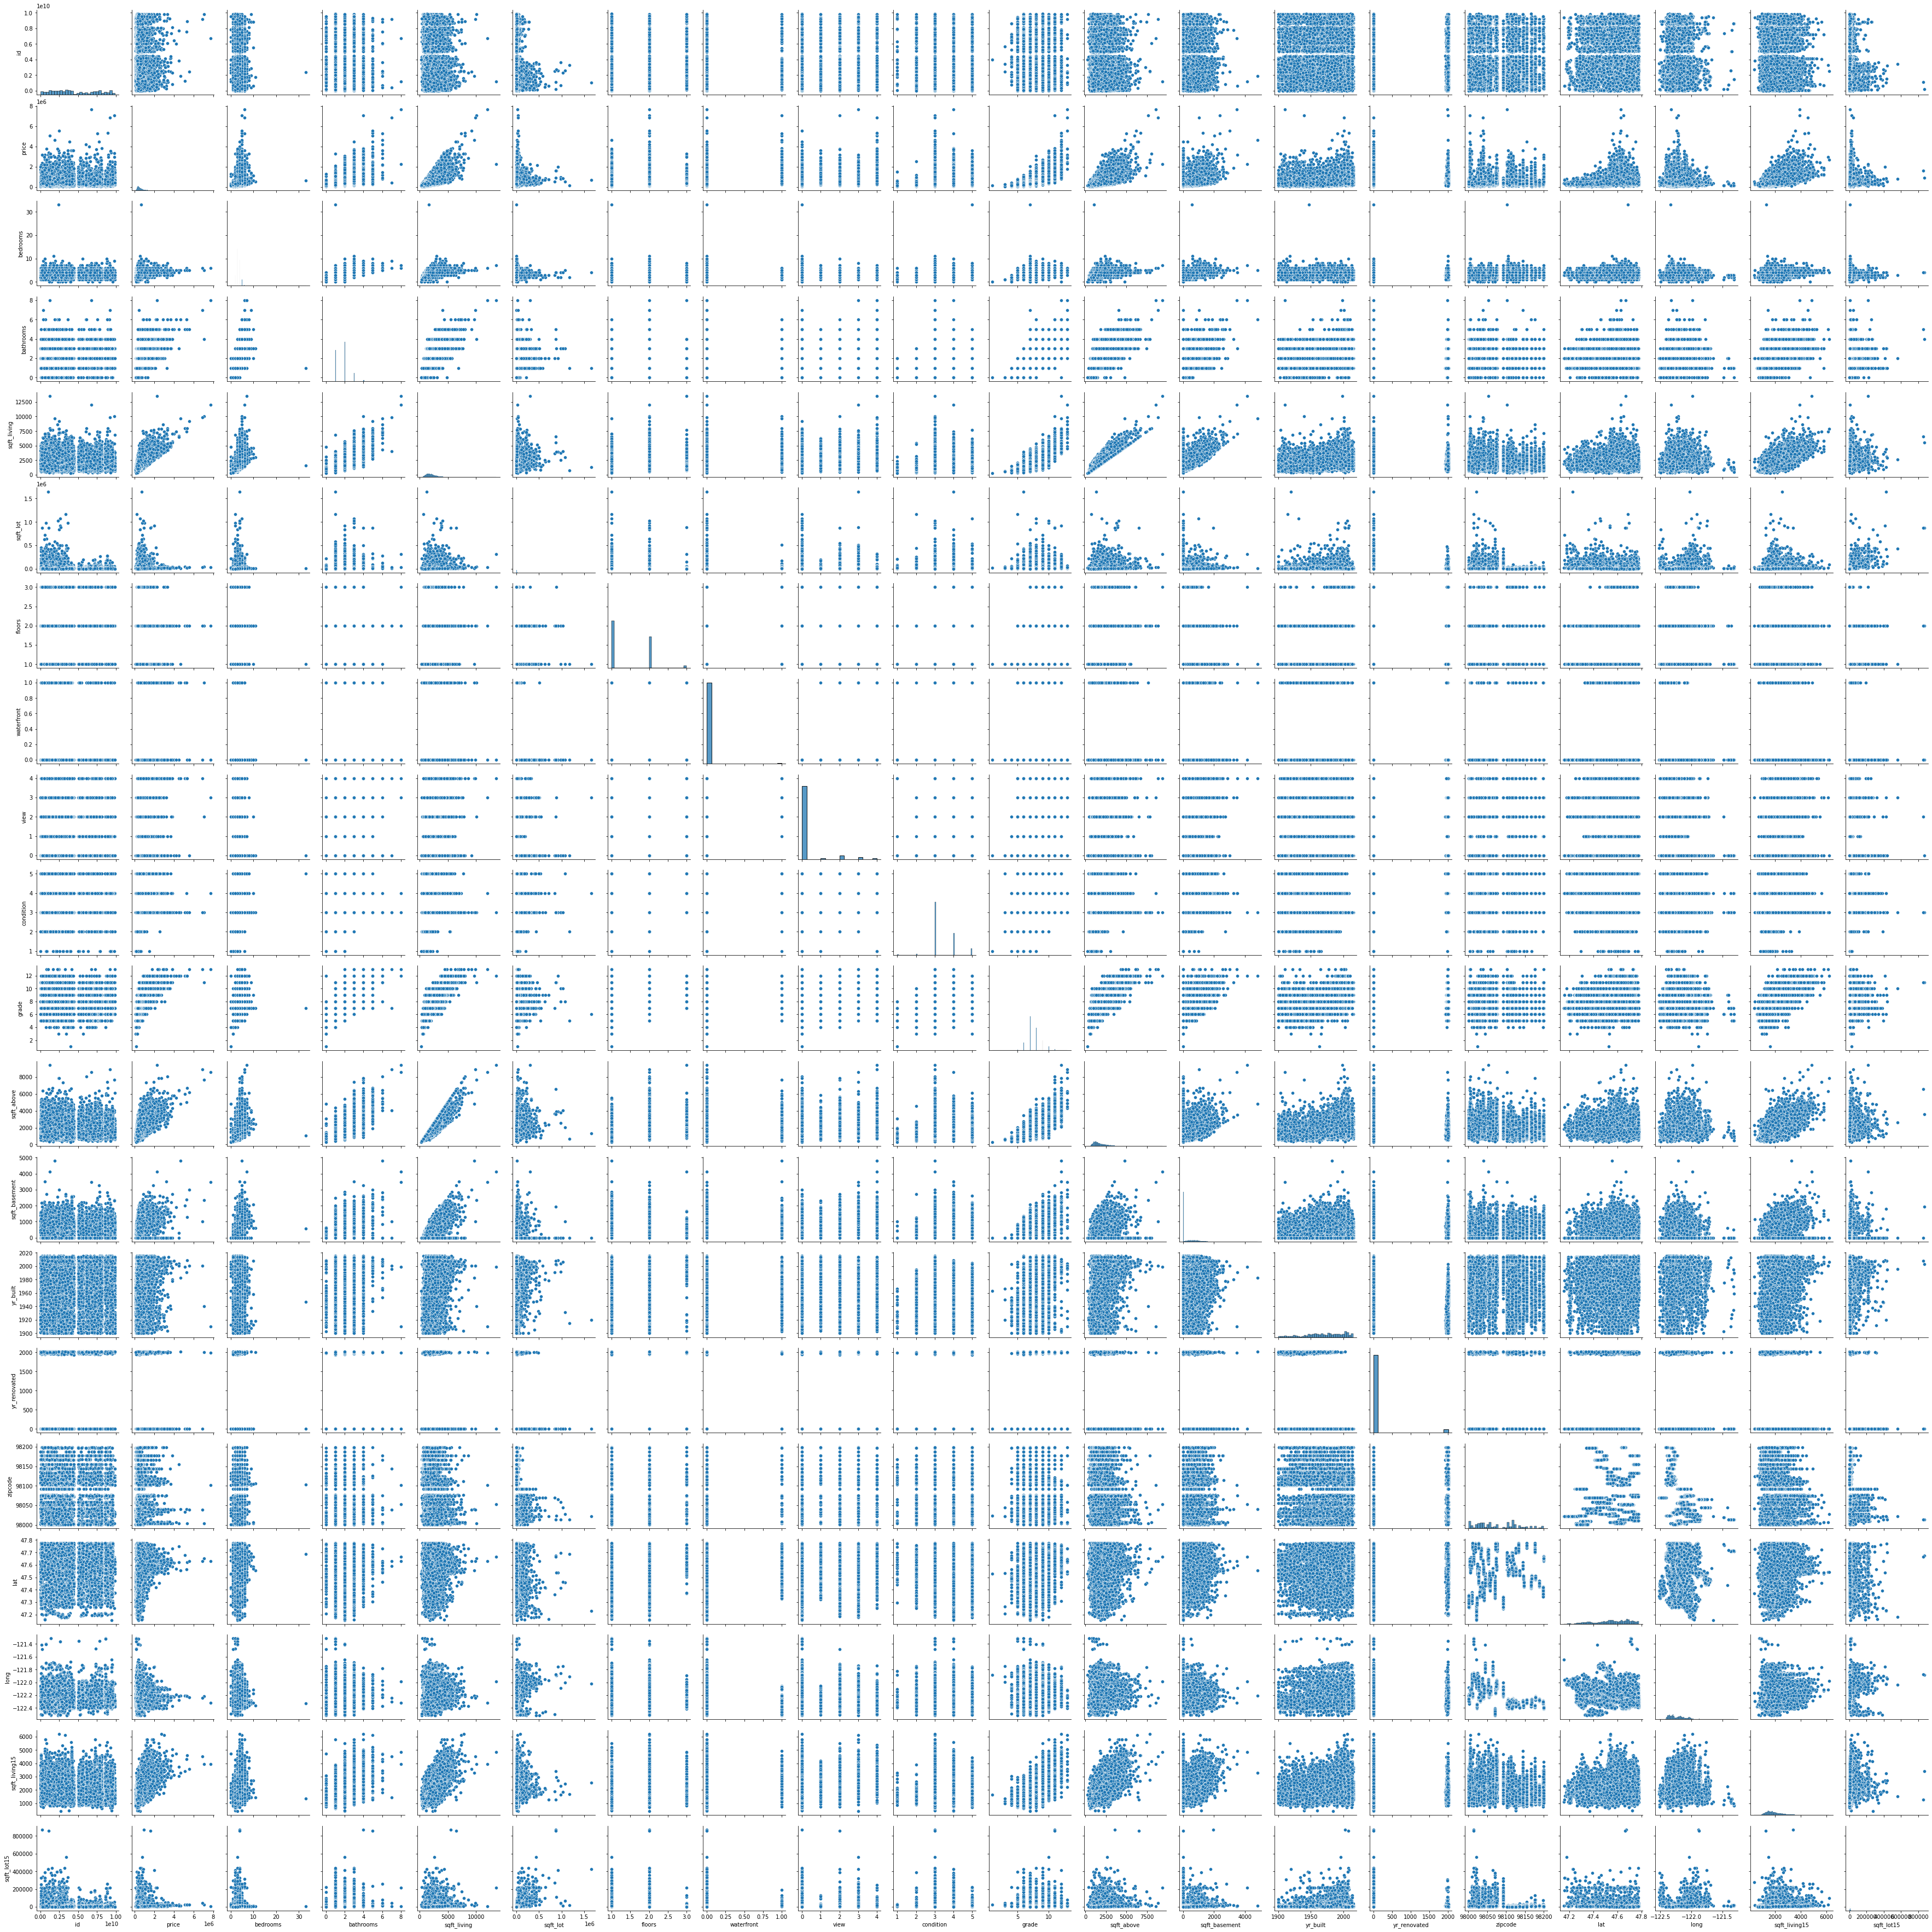

In [50]:
# Ploting the bivariate summaries of the data.
sns.pairplot(houses)
plt.show()

# Regression analysis

### # Check for multicolinearity

In [51]:
# Check for multicolinearity
corr = houses.corr()
corr

id     price  ...  sqft_living15  sqft_lot15
id             1.000000 -0.016803  ...      -0.002869   -0.138778
price         -0.016803  1.000000  ...       0.585382    0.082457
bedrooms       0.001354  0.308346  ...       0.391633    0.029233
bathrooms     -0.000115  0.510096  ...       0.510106    0.080794
sqft_living   -0.012239  0.702046  ...       0.756420    0.183285
sqft_lot      -0.132101  0.089658  ...       0.144620    0.718556
floors         0.019073  0.237215  ...       0.296537   -0.013232
waterfront    -0.002717  0.266332  ...       0.086469    0.030702
view           0.011785  0.397466  ...       0.280404    0.072577
condition     -0.023686  0.036397  ...      -0.092854   -0.003424
grade          0.008093  0.667478  ...       0.713208    0.119265
sqft_above    -0.010857  0.605569  ...       0.731870    0.194060
sqft_basement -0.005084  0.323849  ...       0.200367    0.017260
yr_built       0.021218  0.053980  ...       0.326298    0.070999
yr_renovated  -0.016688  0.126503  ...      -0.002841    0.007837
zipcode       -0.008129 -0.053162  ...      -0.279033   -0.147257
lat           -0.001861  0.306922  ...       0.048839   -0.086423
long           0.020776  0.021567  ...       0.334592    0.254475
sqft_living15 -0.002869  0.585382  ...       1.000000    0.183194
sqft_lot15    -0.138778  0.082457  ...       0.183194    1.000000

[20 rows x 20 columns]

### Get the varriance Inflation Factor (VIF)

In [52]:
# Get the varriance Inflation Factor (VIF)
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

id     price  ...  sqft_living15  sqft_lot15
id             1.028477  0.033102  ...       0.010378    0.105765
price          0.033102  3.354108  ...      -0.144147    0.098514
bedrooms       0.000912  0.301801  ...       0.015730    0.101324
bathrooms      0.000972 -0.340312  ...       0.162385    0.034925
sqft_living   -0.029976 -5.120966  ...       2.691963    0.233611
sqft_lot       0.077292 -0.043441  ...       0.164691   -1.452240
floors        -0.008254 -0.011548  ...       0.219143    0.096182
waterfront     0.002961 -0.461663  ...       0.075689   -0.030986
view          -0.038205 -0.370847  ...      -0.309935   -0.022202
condition      0.021950 -0.161987  ...       0.082644   -0.027939
grade         -0.049391 -1.035015  ...      -0.859708    0.038936
sqft_above     0.041195  3.271580  ...      -3.900900   -0.416619
sqft_basement  0.007322  1.872363  ...      -1.772293   -0.178622
yr_built       0.021161  0.691267  ...       0.032915   -0.019463
yr_renovated   0.016923 -0.071979  ...       0.099412   -0.022745
zipcode       -0.000270  0.285992  ...       0.203685   -0.008587
lat            0.007149 -0.763150  ...      -0.058327    0.015123
long          -0.072522  0.269853  ...      -0.368097   -0.158637
sqft_living15  0.010378 -0.144147  ...       2.977531   -0.128465
sqft_lot15     0.105765  0.098514  ...      -0.128465    2.150003

[20 rows x 20 columns]

In [53]:
# residual plots and heteroskedasticity testing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = houses.values
y = houses['price'].values

# Train and test data
X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.4, random_state=0)

#Fit into a alinear regression
regressor = LinearRegression()
regressor.fit(X_train, price_train)

LinearRegression()

In [54]:
# This model predicts price
price_predict = regressor.predict(X_test)

# Residual = the test value subtracted from predicted value for each row 
residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

1.0265968793857461e-10

In [55]:
import scipy as sp
test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# compute  the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, null hypothesis is rejected. 
# Otherwise, the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## Multiple Linear Regression


In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [57]:
#separate independent and dependent variable
X = houses.iloc[:,1:-1].values
y = houses.iloc[:,-1] .values

In [58]:
##split dataset into training and test dataset
#Train using 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [60]:
# fitting the polynomial regression
poly_reg = PolynomialFeatures (degree=5)
X_poly = poly_reg.fit_transform(X)

In [61]:
# Fit linear Regression to to the polynomial
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression()

In [62]:
# Creating a regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)

ValueError: ignored

In [ ]:
# regression coefficient
regressor.intercept_

In [ ]:
# regression coefficient
regressor.coef_

In [ ]:
for i in range(4):
    print(regressor.coef_[i])

In [ ]:
# compare the predicted and actual data
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

In [ ]:
# Predicting the Test set results
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
# The RMSE for X-train
rmse=np.sqrt(mean_squared_error(y_train,regressor.predict(X_train)))
rmse

In [ ]:
# regressor score
regressor.score(X_train,y_train)


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()

## Ridge Regression


In [ ]:
#Import the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
X = houses.iloc[:,1:-1].values
y = houses.iloc[:,-1] .values


In [ ]:
# Grid search
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid=
                      {'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',
                      n_jobs=1,refit=True,cv=10)


In [ ]:
# Using the fit function to run the model 
# Use the best_params_ and best_scores_ function to determine the models strength. 

search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

In [ ]:
# fit the model with the ridge information and find the mean squared error 
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

## Lasso Regression


#### Import the linear models

In [ ]:
#import the libraries
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [ ]:
# Standadizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Create the lasso object
lasso = linear_model.Lasso() 

In [ ]:
# Fit the models
lasso.fit(X, y) 

In [ ]:
# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

In [ ]:
# split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

## Quantile Regression


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# recalling the base model
print(first_model)

In [ ]:
# Regression coefficients for the median 0.5 quantile
mod = smf.quantreg('price ~ bedrooms', houses)
res = mod.fit(q=.5)

# Then print out the summary of our model
print(res.summary())

## Elastic Net Regression

In [ ]:
# importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Creating our linear regression model for the purpose of comparison
print(first_model) 

In [ ]:
# Create the grid.
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,
                    param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':
                                [.2,.4,.6,.8]},scoring='neg_mean_squared_error',
                    n_jobs=1,refit=True,cv=10)


In [ ]:
# Fit the model 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

In [ ]:
from sklearn.linear_model import ElasticNet
X = houses.iloc[:,1:-1].values
y = houses.iloc[:,-1] .values

In [ ]:
regr = ElasticNet(random_state=0)
regr.fit(X, y)
third_model = (mean_squared_error(y_true=y,y_pred=regr.predict(X)))
print(third_model)

In [ ]:
print(regr.coef_)

In [ ]:
print(regr.intercept_)

# Conclusion

we compare the MSE to come up with the suitable method